# Time Series (Part 3): Pandas DateTime Example

In this notebook, you will learn the followings:
 - Selection, filter by date time
 - Resampling
 - Shifting
 - Windowing

Read more:
 - "Python for Data Analysis" textbook by Wes McKinney textbook (Chapter 11)
 - https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html


In [79]:
import numpy as np
import pandas as pd
import datetime

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn; seaborn.set()

**Note**: Install pandas-datareader package through the following command:

`conda install pandas-datareader`

In [96]:
from pandas_datareader import data

goog = data.DataReader('GOOG', start='2004', end='2016', data_source='yahoo')

In [98]:
goog.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2863 entries, 2004-08-19 to 2015-12-31
Data columns (total 6 columns):
High         2863 non-null float64
Low          2863 non-null float64
Open         2863 non-null float64
Close        2863 non-null float64
Volume       2863 non-null float64
Adj Close    2863 non-null float64
dtypes: float64(6)
memory usage: 156.6 KB


In [99]:
goog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [81]:
goog.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,751.349976,746.619995,749.549988,748.400024,527200.0,748.400024
2015-12-28,762.989990,749.520020,752.919983,762.510010,1515300.0,762.510010
2015-12-29,779.979980,766.429993,766.690002,776.599976,1765000.0,776.599976
2015-12-30,777.599976,766.900024,776.599976,771.000000,1293300.0,771.000000
2015-12-31,769.500000,758.340027,769.500000,758.880005,1500900.0,758.880005


## 1. Indexing/selection

In [82]:
# index slicing
goog['2004-08-19':'2004-08-20']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770


In [83]:
goog['2004']

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086
...,...,...,...,...,...,...
2004-12-27,96.289085,94.196930,94.221832,95.596680,12253959.0,95.596680
2004-12-28,96.413620,95.148361,95.696304,96.020096,8322679.0,96.020096
2004-12-29,96.398674,95.531921,95.531921,96.089828,5376276.0,96.089828


In [84]:
# statistics
goog['2004'].describe()

,High,Low,Open,Close,Volume,Adj Close
count,94.000000,94.000000,94.000000,94.000000,9.400000e+01,94.000000
mean,77.061209,74.198217,75.433321,75.617206,1.822185e+07,75.617206
std,16.658645,16.038752,16.407458,16.245280,1.244743e+07,16.245280
min,50.680038,47.800831,49.409801,49.818268,4.081040e+06,49.818268
25%,60.303967,58.352530,59.287776,59.091014,9.556486e+06,59.091014
50%,84.884331,82.030033,83.932899,83.452202,1.493608e+07,83.452202
75%,90.884342,88.276619,89.632782,89.823322,2.291482e+07,89.823322
max,100.423592,96.309013,99.243011,98.431053,7.406036e+07,98.431053


In [85]:
# we will only use close column
goog = goog['Close']
type(goog)

pandas.core.series.Series

In [86]:
goog['2009':'2010']

Date
2009-01-02    160.060059
2009-01-05    163.412491
2009-01-06    166.406265
2009-01-07    160.403763
2009-01-08    161.987823
                 ...    
2010-12-27    300.065277
2010-12-28    298.341736
2010-12-29    299.377869
2010-12-30    298.311859
2010-12-31    295.875977
Name: Close, Length: 504, dtype: float64

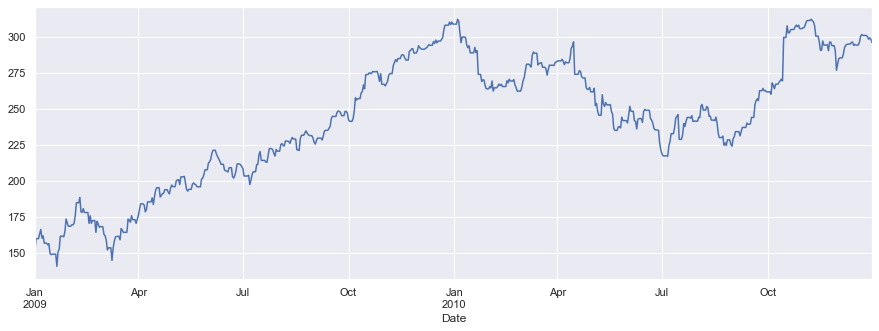

In [94]:
# visualize the historical price
fig = plt.figure(figsize=(15,5))
goog['2009':'2010'].plot();

### Resampling and converting frequencies

One common need for time series data is resampling at a higher or lower frequency.
This can be done using the ``resample()`` method, or the much simpler ``asfreq()`` method.
The primary difference between the two is that ``resample()`` is fundamentally a *data aggregation*, while ``asfreq()`` is fundamentally a *data selection*.

Taking a look at the Google closing price, let's compare what the two return when we down-sample the data.
Here we will resample the data at the end of business year:

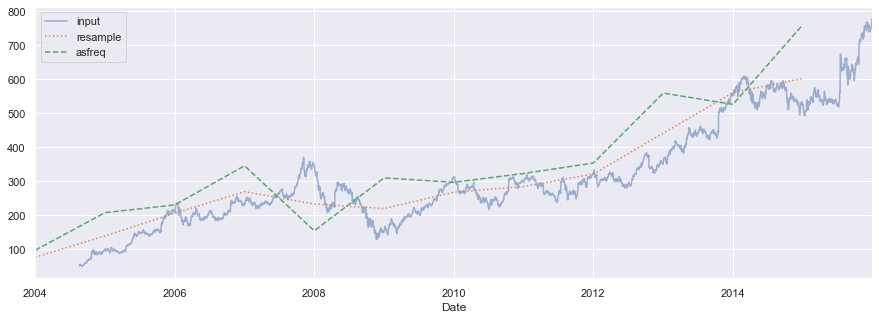

In [95]:
fig = plt.figure(figsize=(15,5))

goog.plot(alpha=0.5, style='-')
goog.resample('A').mean().plot(style=':')
goog.asfreq('A').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

Notice the difference: at each point, ``resample`` reports the *average of the previous year*, while ``asfreq`` reports the *value at the end of the year*.

For up-sampling, ``resample()`` and ``asfreq()`` are largely equivalent, though resample has many more options available.
In this case, the default for both methods is to leave the up-sampled points empty, that is, filled with NA values.
Just as with the ``pd.fillna()`` function discussed previously, ``asfreq()`` accepts a ``method`` argument to specify how values are imputed.
Here, we will resample the business day data at a daily frequency (i.e., including weekends):

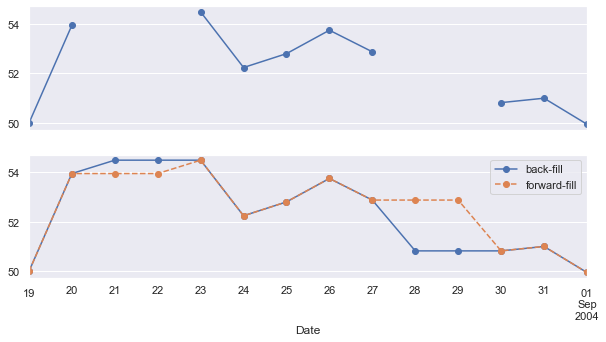

In [89]:
fig, ax = plt.subplots(2, sharex=True,figsize=(10,5))
data = goog.iloc[:10]

data.asfreq('D').plot(ax=ax[0], marker='o')

data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

The top panel is the default: non-business days are left as NA values and do not appear on the plot.
The bottom panel shows the differences between two strategies for filling the gaps: forward-filling and backward-filling.

### Time-shifts

Another common time series-specific operation is shifting of data in time.
Pandas has two closely related methods for computing this: ``shift()`` and ``tshift()``
In short, the difference between them is that ``shift()`` *shifts the data*, while ``tshift()`` *shifts the index*.
In both cases, the shift is specified in multiples of the frequency.

Here we will both ``shift()`` and ``tshift()`` by 900 days; 

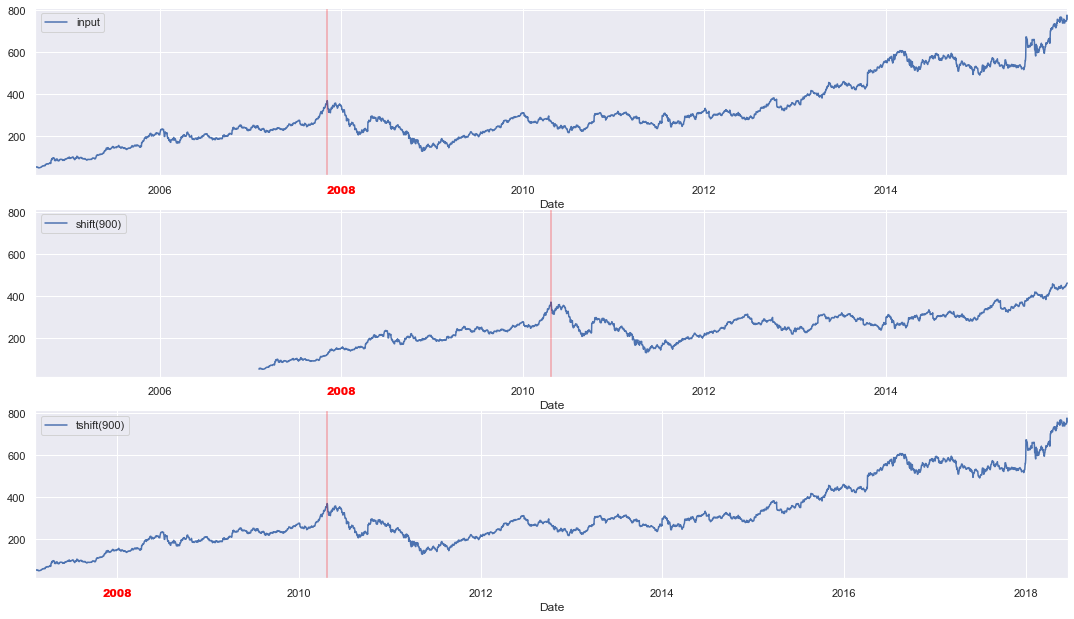

In [90]:
fig, ax = plt.subplots(3, sharey=True)
fig.set_size_inches(18.5, 10.5)

# apply a frequency to the data
goog = goog.asfreq('D', method='pad')

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1])
goog.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2007-11-05')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

We see here that ``shift(900)`` shifts the *data* by 900 days, pushing some of it off the end of the graph (and leaving NA values at the other end), while ``tshift(900)`` shifts the *index values* by 900 days.

A common context for this type of shift is in computing differences over time. For example, we use shifted values to compute the one-year return on investment for Google stock over the course of the dataset:

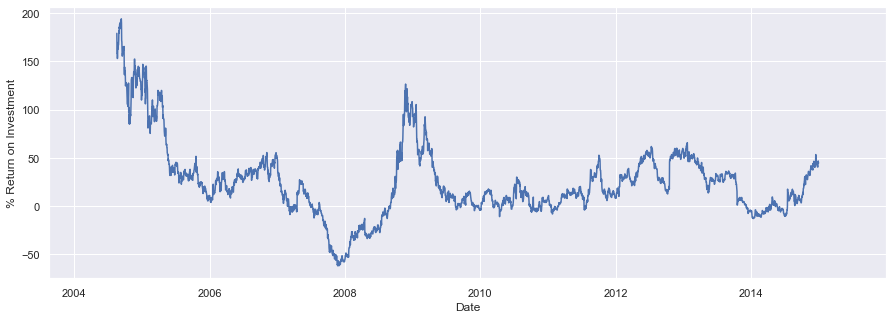

In [91]:
fig = plt.figure(figsize=(15,5))
ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel('% Return on Investment');
fig.savefig('ROI.png')

This helps us to see the overall trend in Google stock: thus far, the most profitable times to invest in Google have been (unsurprisingly, in retrospect) shortly after its IPO, and in the middle of the 2009 recession.

### Rolling windows

Rolling statistics are a third type of time series-specific operation implemented by Pandas.
These can be accomplished via the ``rolling()`` attribute of ``Series`` and ``DataFrame`` objects, which returns a view similar to what we saw with the ``groupby`` operation (see [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)).
This rolling view makes available a number of aggregation operations by default.

For example, here is the one-year centered rolling mean and standard deviation of the Google stock prices:

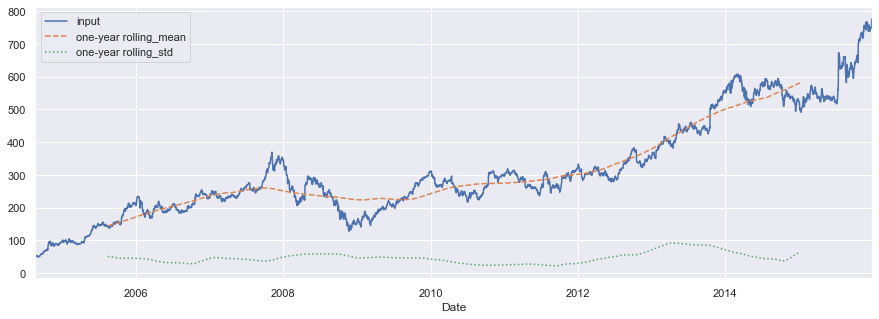

In [93]:
rolling = goog.rolling(720, center=True)

data = pd.DataFrame({'input': goog,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})

fig,ax = plt.subplots(figsize=(15,5))
data.plot(style=['-', '--', ':'], ax=ax)
#ax.lines[0].set_alpha(0.3)